In [61]:

import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/IMDB Dataset.csv", nrows=38020)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
38015,A young woman (Jean Simmons) is convinced by h...,positive
38016,The Cure uses voice over to create an intense ...,positive
38017,Mom has to be one of the all time uncomfortabl...,positive
38018,The only thing I remember about this movie are...,negative


In [ ]:
df = df.sample(n=500, random_state=42)

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)
df['review'] = df['review'].apply(remove_html_tags)

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)
df['review'] = df['review'].apply(remove_url)

In [ ]:
import re

def clean_review(text):
    # Remove unwanted text using regular expressions
    text = re.sub(r'\d{1,2} [a-zA-Z]+ \d{4}', '', text)  # Remove date
    text = re.sub(r'\d+ out of \d+ found this helpful\. was this review helpful\? sign in to vote\.permalink', '', text)  # Remove review stats
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and trim

    return text
df['review'] = df['review'].apply(clean_review)


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['review'] = df['review'].apply(remove_emoji)

In [ ]:
import string

exclude = string.punctuation

def remove_punc(text):
    for char in exclude:
        text = text.replace(char, '')
    return text

# Assuming 'df' is the name of your DataFrame and 'review' is the column containing reviews
df['review'] = df['review'].apply(remove_punc)


In [ ]:
slang_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [ ]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in slang_dict:
            new_text.append(slang_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)
df['review'] = df['review'].apply(chat_conversion)


In [ ]:
from textblob import TextBlob

def correct_spelling(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Correct spelling
    corrected_text = str(blob.correct())

    return corrected_text
df['review'] = df['review'].apply(correct_spelling)


In [26]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the necessary resource for tokenization

# Ensure 'review' column is of string type
df['review'] = df['review'].astype(str)

# Tokenize the 'review' column
df['tokenized_review'] = df['review'].apply(lambda text: word_tokenize(text))

# Print the tokenized reviews
for index, row in df.iterrows():
    print(f"Review {index + 1} tokens: {row['tokenized_review']}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Review 33931 tokens: ['reading', 'documentary', 'rented', 'watched', 'teenage', 'children', 'amazingly', 'wellbalanced', 'showing', 'sides', 'perspective', 'leaving', 'many', 'questions', 'unanswered', 'be', 'watch', 'documentary', 'told', 'think', 'watch', 'learn', 'draw', 'conclusionsafterward', 'took', 'trip', 'was', 'visited', 'branch', 'davidians', 'site', 'conflagration', 'potent', 'lesson', 'seeing', 'yourself', 'drove', 'home', 'basic', 'underlying', 'honesty', 'behind', 'was', 'rules', 'engagement', 'open', 'eyes', 'look', 'facts', 'speak', 'themselves']
Review 23274 tokens: ['negative', 'reviews', 'expect', 'movie', 'like', 'masterpiece', 'you', 'movie', 'tried', 'entertain', 'us', 'worked', 'me', 'oscar', 'contended', 'entertainment', 'really', 'see', 'movie', 'aged', 'especially', 'everything', 'internet', 'offer', 'nowadays', 'still', 'remember', 'first', 'released', 'net', 'still', 'new', 'crazy', 'scar', 'thoughts', 'saw', 'first', 'Years', 'in', 'my', 'eyes', 'seriously

In [30]:
import nltk

nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Assuming 'tokenized_review' column contains tokenized text
df['lemmatized_review'] = df['tokenized_review'].apply(lambda tokens: [WordNetLemmatizer().lemmatize(word, get_pos(word)) for word in tokens])

# Print the lemmatized reviews
for index, row in df.iterrows():
    print(f"Lemmatized Review {index + 1}: {row['lemmatized_review']}")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Review 33931: ['reading', 'documentary', 'rent', 'watch', 'teenage', 'child', 'amazingly', 'wellbalanced', 'show', 'side', 'perspective', 'leave', 'many', 'question', 'unanswered', 'be', 'watch', 'documentary', 'told', 'think', 'watch', 'learn', 'draw', 'conclusionsafterward', 'take', 'trip', 'be', 'visit', 'branch', 'davidians', 'site', 'conflagration', 'potent', 'lesson', 'see', 'yourself', 'drove', 'home', 'basic', 'underlie', 'honesty', 'behind', 'be', 'rule', 'engagement', 'open', 'eye', 'look', 'fact', 'speak', 'themselves']
Lemmatized Review 23274: ['negative', 'review', 'expect', 'movie', 'like', 'masterpiece', 'you', 'movie', 'try', 'entertain', 'u', 'work', 'me', 'oscar', 'contend', 'entertainment', 'really', 'see', 'movie', 'age', 'especially', 'everything', 'internet', 'offer', 'nowadays', 'still', 'remember', 'first', 'release', 'net', 'still', 'new', 'crazy', 'scar', 'thought', 'saw', 'first', 'Years', 'in', 'my', 'eye', 'seriously', 'thought', 'anyone', 'could

In [31]:
df['review']=df['lemmatized_review']

In [47]:
X=df['review']
y=df.iloc[:,1]

In [48]:
map_dict = {'positive':1,
           'negative':0}
y = y.map(map_dict)
y.head()

33930    1
23273    1
22268    0
15219    1
31067    0
Name: sentiment, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)



In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((375,), (125,), (375,), (125,))

In [51]:
import numpy as np

# Assuming X_train and X_test are NumPy arrays
X_train = np.vectorize(str)(X_train)
X_test = np.vectorize(str)(X_test)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train = tfidf.fit_transform(X_train)

# Transform the test data
X_test= tfidf.transform(X_test)

**Model Selection**

Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_test_pred=log_reg.predict(X_test)
y_train_pred=log_reg.predict(X_train)


In [56]:
y_test_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [57]:
# Probabilities for the training set
y_train_prob = log_reg.predict_proba(X_train)[:, 1]

# Probabilities for the test set
y_test_prob = log_reg.predict_proba(X_test)[:, 1]


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Other metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix (Training Set):\n", conf_matrix_train)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix (Training Set):
 [[177   2]
 [  2 194]]

Confusion Matrix (Test Set):
 [[35 16]
 [10 64]]

Accuracy: 0.792
Precision: 0.8
Recall: 0.8648648648648649
F1 Score: 0.8311688311688312


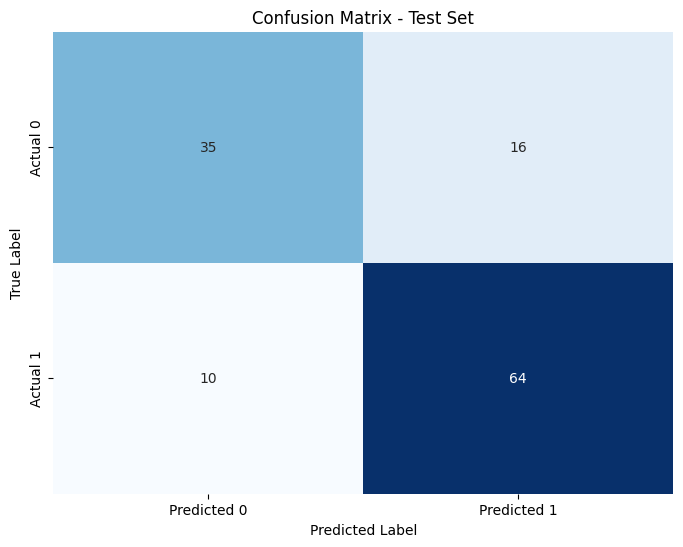

Metrics for Test Set:
Accuracy: 0.792
Precision: 0.8
Recall: 0.8648648648648649
F1 Score: 0.8311688311688312


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plot_confusion_matrix(conf_matrix_test, title='Confusion Matrix - Test Set')

# Other metrics for the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print results
print("Metrics for Test Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
